## Notebook Setup

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetics
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load Cleaned Data
df = pd.read_csv("D:/Data Science Projects/Player Performance Prediction/data/processed/fifa_cleaned.csv")
df.head()

,Unnamed: 0,short_name,age,height_cm,weight_kg,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,defending,physic,attacking_finishing,attacking_short_passing,mentality_vision,movement_reactions,power_shot_power,overall,potential,player_positions
0,0,L. Messi,33,170,72,67500000,560000,5,4,4,...,38.0,65.0,95,91,95,94,86,93,93,"RW, ST, CF"
1,1,Cristiano Ronaldo,35,187,83,46000000,220000,5,4,5,...,35.0,77.0,95,82,82,95,94,92,92,"ST, LW"
2,3,R. Lewandowski,31,184,80,80000000,240000,4,4,4,...,43.0,82.0,94,84,79,93,89,91,91,ST
3,4,Neymar Jr,28,175,68,90000000,270000,5,5,5,...,36.0,59.0,87,87,90,91,80,91,91,"LW, CAM"
4,5,K. De Bruyne,29,181,70,87000000,370000,4,5,4,...,64.0,78.0,82,94,94,91,91,91,91,"CAM, CM"


### Basic Distribution Plots

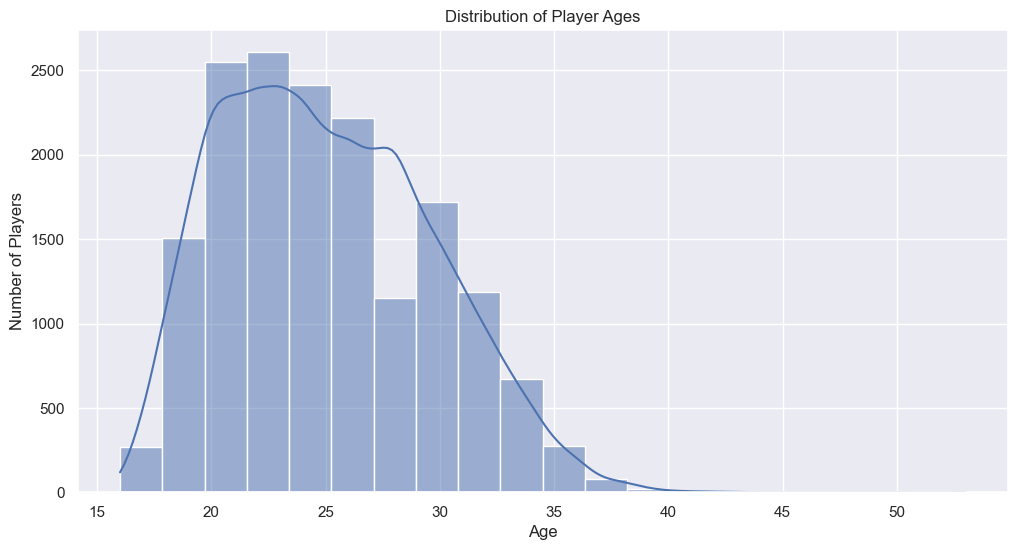

In [19]:
# Age Distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

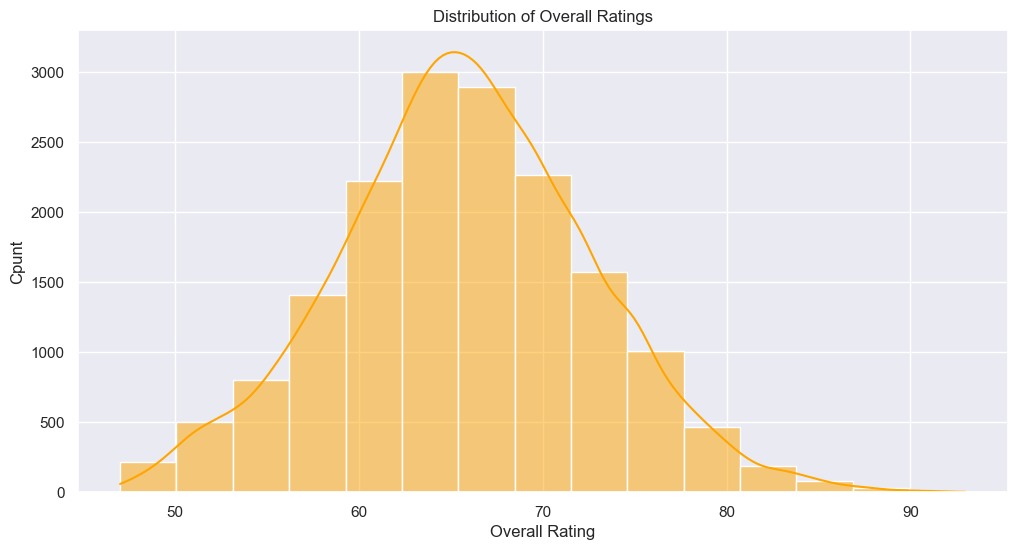

In [20]:
# Overall Rating Distribution
sns.histplot(df['overall'], bins=15, kde=True, color='orange')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Cpunt')
plt.show()

### Comparing Target Variable by Position

C:\Users\himan\AppData\Local\Temp\ipykernel_27564\1150389070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_group.values, y=position_group.index, palette='viridis')


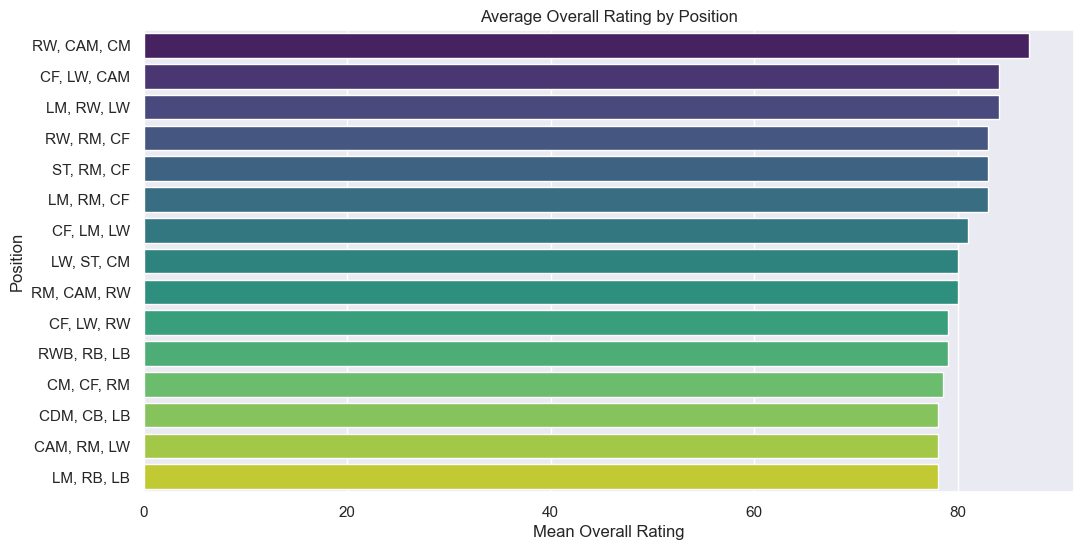

In [21]:
# Average overall rating by position
position_group = df.groupby('player_positions')['overall'].mean().sort_values(ascending=False).head(15)

sns.barplot(x=position_group.values, y=position_group.index, palette='viridis')
plt.title('Average Overall Rating by Position')
plt.xlabel('Mean Overall Rating')
plt.ylabel('Position')
plt.show()

### Coorelation Heatmap

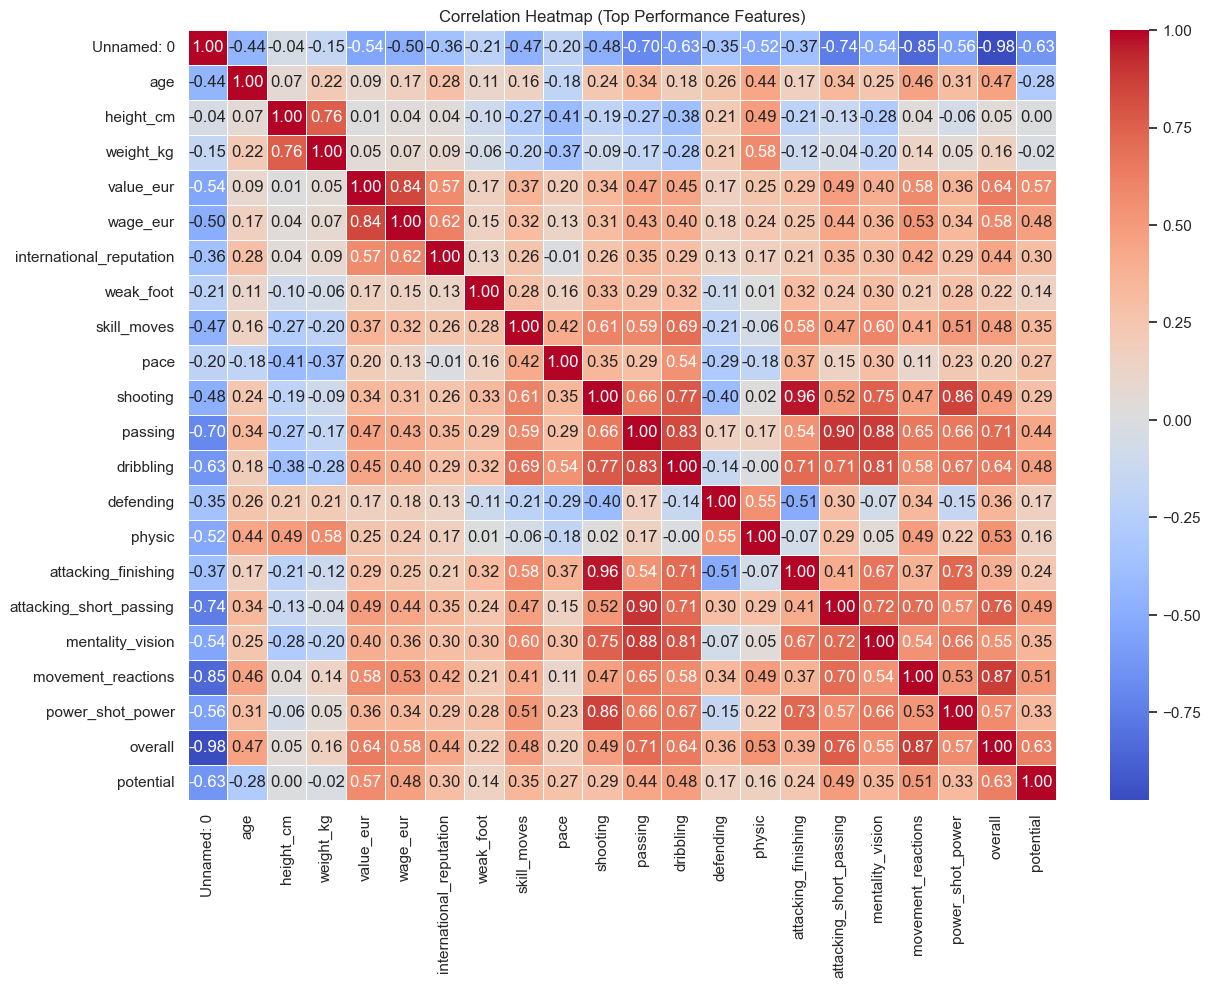

In [22]:
# Use only numerical columns
numeric_df = df.select_dtypes(include=np.number)

corr = numeric_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, )
plt.title('Correlation Heatmap (Top Performance Features)')
plt.show()

### Potential vs Value - Insight Plot

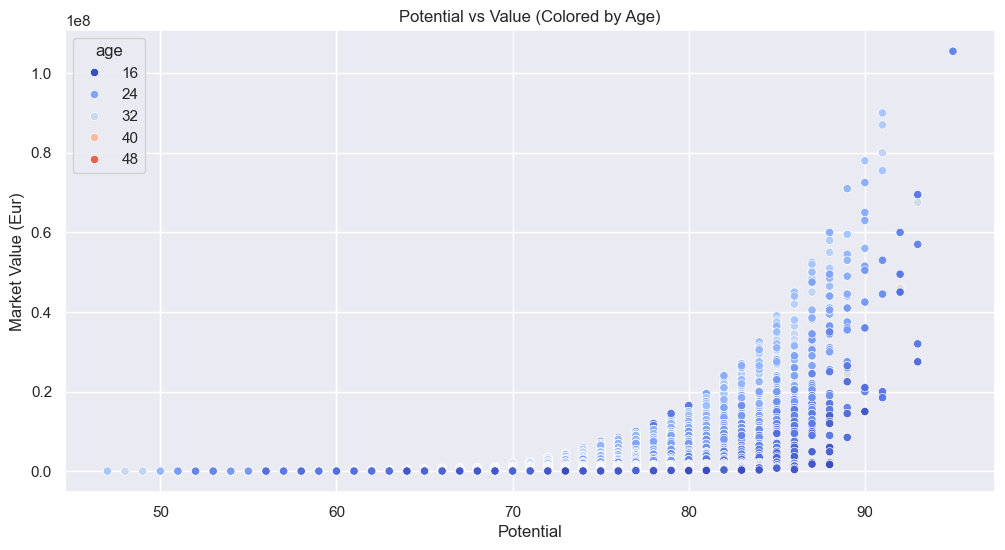

In [23]:
sns.scatterplot(x='potential', y='value_eur', data=df, hue='age', palette='coolwarm')
plt.title('Potential vs Value (Colored by Age)')
plt.xlabel('Potential')
plt.ylabel('Market Value (Eur)')
plt.show()

### Boxplots for Skill Distribution by Position

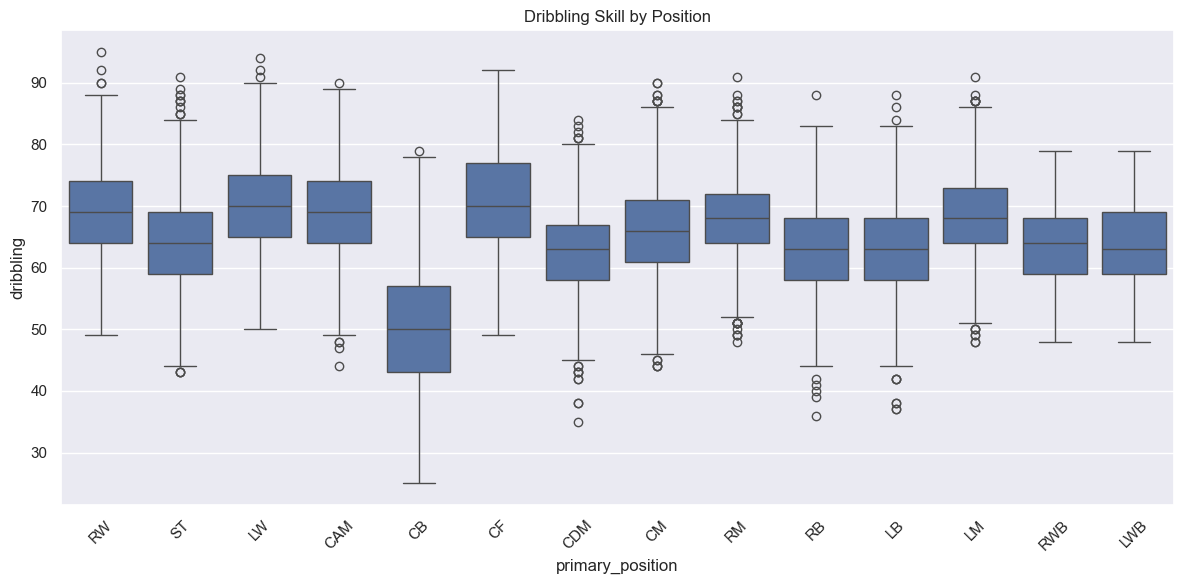

In [24]:
#Creating a new column with just the primary position
df['primary_position'] = df['player_positions'].str.split(',').str[0]

sns.boxplot(x='primary_position', y='dribbling', data=df)
plt.xticks(rotation=45)
plt.title('Dribbling Skill by Position')
plt.tight_layout()
plt.show()